In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

plt.style.use("seaborn")

In [24]:
df_geo = gpd.read_file(os.path.join("..", "geo", "shapefiles", "kreisgrenzen_2019-shp", "Kreisgrenzen_2019.shp"))
df_raw = pd.read_csv("../data/processed/data.csv", index_col = 0)

In [50]:
df = df_raw[df_raw.columns[1:]]
df = df.drop_duplicates()
df = df.sort_values("kreis_key").reset_index(drop=True)
df = df[["kreis_key", "kreis_name",  "income_pp_2018", "income_2018", "crimes_2018", "population_2018", "crimes_pp_2018"]]
df = df.dropna()
df.kreis_key = df.kreis_key.astype(int).astype(str).str.zfill(5)
df.income_pp_2018 = pd.to_numeric(df.income_pp_2018)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 1 to 873
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kreis_key        401 non-null    object 
 1   kreis_name       401 non-null    object 
 2   income_pp_2018   401 non-null    int64  
 3   income_2018      401 non-null    object 
 4   crimes_2018      401 non-null    float64
 5   population_2018  401 non-null    object 
 6   crimes_pp_2018   401 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 25.1+ KB


In [52]:
df_comb = df_geo.merge(df, left_on = "RS", right_on = "kreis_key", how = "left", validate ="one_to_one")

In [53]:
plt.rcParams["figure.figsize"] = [16, 11]

In [54]:
df_geo = df_geo.assign(first_digits = lambda x: x['RS'].str.slice(start=0, stop=2))

In [55]:
fig, ax = plt.subplots()

df_comb.plot(
    ax=ax, 
    column='income_pp_2018',
    alpha=0.9,
    legend = True
)

ax.set(
    title='Verfügbares Einkommen der privaten Haushalte in Euro je Einwohner (2018)', 
    aspect=1.3, 
    facecolor='lightblue'
);

plt.figtext(0.5, 0.02, "Datenquelle: Regionaldatenbank Deutschland, 2021", ha="center", fontsize=10)

plt.savefig(os.path.join("..", "output", "income_pp_2018.png"))
plt.close("all")


In [56]:
fig, ax = plt.subplots()

df_comb.plot(
    ax=ax, 
    column='crimes_pp_2018',
    alpha=0.9,
    legend = True
)

ax.set(
    title='Erfasste Straftaten je Einwohner (2018)', 
    aspect=1.3, 
    facecolor='lightblue'
);

plt.figtext(0.5, 0.02, "Datenquelle: BKA, 2019", ha="center", fontsize=10)

plt.savefig(os.path.join("..", "output", "crimes_pp_2018.png"))
plt.close("all")

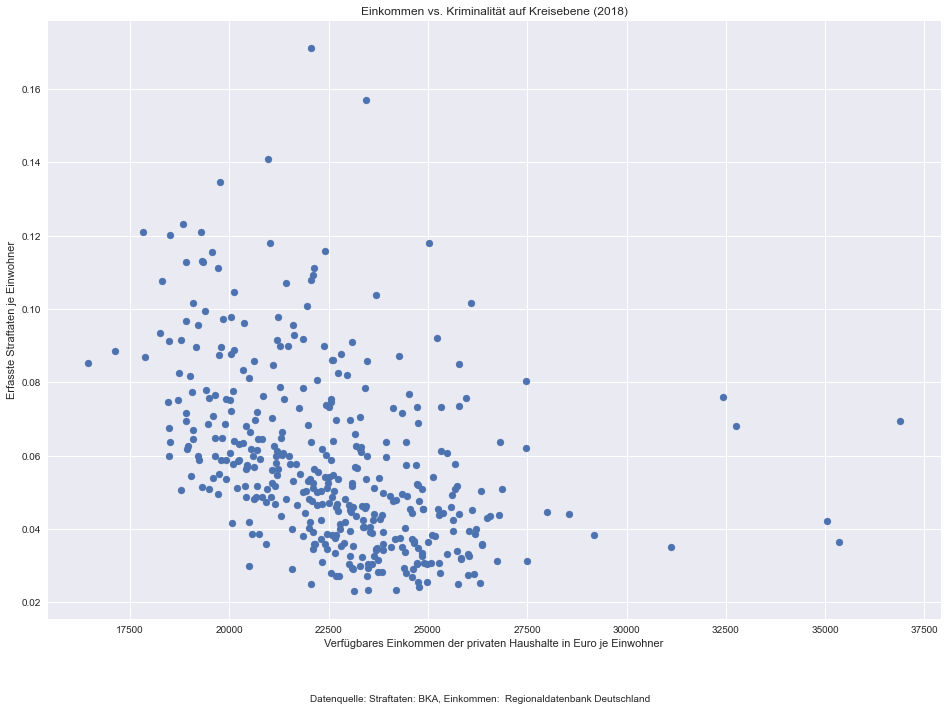

In [58]:

plt.scatter(df.income_pp_2018, df.crimes_pp_2018)

plt.title("Einkommen vs. Kriminalität auf Kreisebene (2018)")
plt.xlabel("Verfügbares Einkommen der privaten Haushalte in Euro je Einwohner")
plt.ylabel("Erfasste Straftaten je Einwohner")

plt.figtext(0.5, 0.02, "Datenquelle: Straftaten: BKA, Einkommen:  Regionaldatenbank Deutschland", ha="center", fontsize=10)

plt.savefig(os.path.join(".." , "output" ,  "crimes_vs_income_2018.png"))
